In [1]:
import pandas as pd

In [2]:
def preprocess_df(location):
    df = pd.read_parquet(location)
    # df=df.head(50000)
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration=df.duration.apply(lambda tr: tr.total_seconds()/60)
    # df=df.drop(df[df.duration < 0].index)
    # df=df[(df.duration >= 1) & (df.duration <= 60)]
    df.PULocationID = df.PULocationID.astype(str)
    df.DOLocationID = df.DOLocationID.astype(str)
    df['travel_map'] = df.PULocationID + "_" + df.DOLocationID

    return df


In [3]:
df_jan=preprocess_df("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
df_feb=preprocess_df("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [4]:
len(df_jan.columns[:-2])

19

In [17]:
df_jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,travel_map
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,...,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333,161_141
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,...,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667,43_237
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,...,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000,48_238
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,...,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667,138_7
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,...,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333,107_79


In [8]:
df_jan['duration'].describe()['std']

np.float64(42.59435124195458)

In [ ]:
100 + ((df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)].shape[0]-df_jan.shape[0])/df_jan.shape[0])*100

98.1220282212598

In [49]:
df_jan_filtered = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]
df_feb_filtered = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)]

In [50]:
df_jan_filtered.PULocationID = df_jan_filtered.PULocationID.astype(str)
df_jan_filtered.DOLocationID = df_jan_filtered.DOLocationID.astype(str)

df_feb_filtered.PULocationID = df_feb_filtered.PULocationID.astype(str)
df_feb_filtered.DOLocationID = df_feb_filtered.DOLocationID.astype(str)

/tmp/ipykernel_189813/1050705275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_filtered.PULocationID = df_jan_filtered.PULocationID.astype(str)
/tmp/ipykernel_189813/1050705275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_filtered.DOLocationID = df_jan_filtered.DOLocationID.astype(str)
/tmp/ipykernel_189813/1050705275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [51]:
categories = ['PULocationID', 'DOLocationID']
target = 'duration'
df_todict = df_jan_filtered[categories].to_dict(orient='records')
df_todict_val = df_feb_filtered[categories].to_dict(orient='records')

In [52]:
df_todict_val

[{'PULocationID': '142', 'DOLocationID': '163'},
 {'PULocationID': '132', 'DOLocationID': '26'},
 {'PULocationID': '161', 'DOLocationID': '145'},
 {'PULocationID': '148', 'DOLocationID': '236'},
 {'PULocationID': '137', 'DOLocationID': '244'},
 {'PULocationID': '263', 'DOLocationID': '141'},
 {'PULocationID': '48', 'DOLocationID': '243'},
 {'PULocationID': '114', 'DOLocationID': '211'},
 {'PULocationID': '114', 'DOLocationID': '249'},
 {'PULocationID': '125', 'DOLocationID': '107'},
 {'PULocationID': '140', 'DOLocationID': '42'},
 {'PULocationID': '140', 'DOLocationID': '226'},
 {'PULocationID': '249', 'DOLocationID': '90'},
 {'PULocationID': '234', 'DOLocationID': '4'},
 {'PULocationID': '114', 'DOLocationID': '125'},
 {'PULocationID': '132', 'DOLocationID': '239'},
 {'PULocationID': '132', 'DOLocationID': '230'},
 {'PULocationID': '140', 'DOLocationID': '68'},
 {'PULocationID': '144', 'DOLocationID': '79'},
 {'PULocationID': '132', 'DOLocationID': '90'},
 {'PULocationID': '236', 'DOL

In [53]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
X_train = vectorizer.fit_transform(df_todict)
y_train = df_jan_filtered[target].values

X_val = vectorizer.transform(df_todict_val)
y_val = df_feb_filtered[target].values

In [54]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [55]:
X_val

<2855951x515 sparse matrix of type '<class 'numpy.float64'>'
	with 5711894 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_train)

/tmp/ipykernel_189813/2220754766.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='predicted_values')
/tmp/ipykernel_189813/2220754766.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual_values')


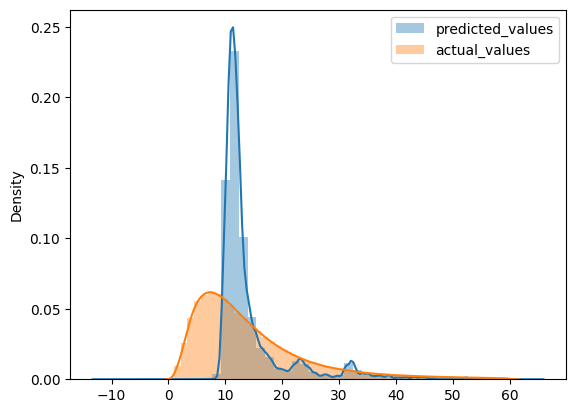

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y_pred, label='predicted_values')
sns.distplot(y_train, label='actual_values')

plt.legend()


In [41]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_train, y_pred)

7.649261822035489

In [56]:
model = LinearRegression()

model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_val)

root_mean_squared_error(y_val, y_pred)

7.811821332387183